In [1]:
from multiomicscellsim.cpm.simulation import CPM
from multiomicscellsim.cpm.cpmentities import CPMCellType, CPMGrid
from multiomicscellsim.cpm.constraints import VolumeConstraint, AdhesionConstraint

  0%|          | 0/50 [00:00<?, ?it/s]/Users/edoardo.giacomello/Projects/Voronoi/multiomicscellsim/cpm/simulation.py:43: RuntimeWarning: overflow encountered in exp
  is_boltzman_passed = (np.random.uniform() <= np.exp(-total_delta_energy/self.grid.temperature))
100%|██████████| 50/50 [00:01<00:00, 28.28it/s]
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.HTMLWriter'>


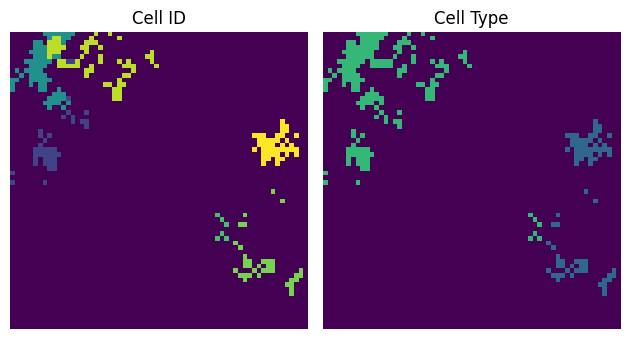

In [12]:
n_cell_types = 3
n_initial_cells = 10

# Cell Type definition (WARNING/TODO: LIST MUST BE ORDERED BY ID!)
bka = 1.0 # background adhesion
cell_types = [
    CPMCellType(id=0, adhesion_energy=[0.0, bka, bka, bka], name="background"),
    CPMCellType(id=1, adhesion_energy=[bka, 0.0, 5.0, 5.0], preferred_volume=9),
    CPMCellType(id=2, adhesion_energy=[bka, 5.0, 0.0, 5.0], preferred_volume=9),
    CPMCellType(id=3, adhesion_energy=[bka, 5.0, 5.0, 0.0], preferred_volume=9),
]

grid = CPMGrid(
                        size=64, 
                        temperature=-5,
                        cell_types=cell_types,
                        constraints=[
                            #AdhesionConstraint(), 
                            VolumeConstraint(lambda_volume=2000)
                            ]
                     )
cpm = CPM(grid=grid)
grid.spawn_random_cell(n_initial_cells)

from IPython.display import HTML
anim = cpm.render_animation(max_steps=50)
HTML(anim.to_jshtml())
